# Pre-processing & Training Data Development :
#### Amin Khoeini

***

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [54]:
movie_score = pd.read_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/pre_process_db.csv')

In [55]:
movie_score.head()

,All_time_gross,tom_cri_score,tom_aud_score,met_cri_score,met_aud_score,imdb_score,imdb_us_score,imdb_fem_score,class
0,62832209,11.180385,0.248638,28.000000,0.536788,2.064492,1.947460,3.230484,Average
1,428028233,24.294221,0.290463,33.000000,1.651263,4.196134,4.240490,3.140899,Average
2,225973340,24.462347,0.620494,36.550000,4.073777,5.110510,4.514100,4.154062,Average
3,42213,1.821366,0.002707,4.783333,0.025261,0.051761,0.079159,0.053576,Indie
4,880166924,62.353765,3.963631,59.616667,17.351644,18.251734,17.747966,13.584817,Blockbuster


In [56]:
movie_score.describe().T

,count,mean,std,min,25%,50%,75%,max
All_time_gross,3276.0,7.193749e+07,1.885635e+08,177.0,223421.250000,3.471091e+06,4.905136e+07,2.797501e+09
tom_cri_score,3276.0,1.249701e+01,1.423395e+01,0.0,2.230298,7.021891e+00,1.815762e+01,8.664799e+01
tom_aud_score,3276.0,8.185137e-01,2.460268e+00,0.0,0.010045,8.998959e-02,6.448805e-01,7.600000e+01
met_cri_score,3276.0,2.129538e+01,1.727440e+01,0.0,7.066667,1.700000e+01,3.230000e+01,8.800000e+01
met_aud_score,3276.0,1.350672e+00,3.828720e+00,0.0,0.054531,2.278970e-01,9.817061e-01,6.473937e+01
imdb_score,3276.0,2.382261e+00,5.223244e+00,0.0,0.102347,4.957343e-01,2.258575e+00,8.800000e+01
imdb_us_score,3276.0,2.512044e+00,5.139497e+00,0.0,0.137849,5.819906e-01,2.478241e+00,8.700000e+01
imdb_fem_score,3276.0,2.682522e+00,5.538160e+00,0.0,0.119661,5.900872e-01,2.615517e+00,8.600000e+01


In [57]:
#Save the class of the movies as movie_class then drop it from the data

movie_class = movie_score['class']
movie_score.drop(columns='class',inplace=True)

In [58]:
#split the data to train/test set. 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(movie_score.drop(columns='All_time_gross'), 
                                                    critics_score.All_time_gross, test_size=0.2, 
                                                    random_state=47)

In [60]:
X_train.shape,y_train.shape

((2620, 7), (2620,))

In [234]:
X_test.shape,y_test.shape

((656, 7), (656,))

In [61]:
X_train.head()

,tom_cri_score,tom_aud_score,met_cri_score,met_aud_score,imdb_score,imdb_us_score,imdb_fem_score
409,4.609457,0.008060,5.833333,0.198276,0.465330,0.559373,0.326985
837,4.728546,0.001306,10.616667,0.063853,0.005592,0.022488,0.002129
936,5.528897,0.003169,7.000000,0.069767,0.088650,0.170548,0.068022
1155,7.040280,0.001348,17.850000,0.091419,0.143119,0.135088,0.108062
1873,8.798599,0.902951,20.000000,0.972534,4.719027,4.780446,4.705971


In [62]:
#check the type to make sure all is numeric
X_train.dtypes

tom_cri_score     float64
tom_aud_score     float64
met_cri_score     float64
met_aud_score     float64
imdb_score        float64
imdb_us_score     float64
imdb_fem_score    float64
dtype: object

In [63]:
X_test.dtypes

tom_cri_score     float64
tom_aud_score     float64
met_cri_score     float64
met_aud_score     float64
imdb_score        float64
imdb_us_score     float64
imdb_fem_score    float64
dtype: object

## Make a Dummy Regresor and perdict the box-office of the movie by mean of the dataset

In [67]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train,y_train)
np.round(dumb_reg.constant_)

array([[67641209.]])

In [70]:
y_pred_dummy = dumb_reg.predict(X_train)
y_pred_dummy[0:5]

array([67641208.62099236, 67641208.62099236, 67641208.62099236,
       67641208.62099236, 67641208.62099236])

In [71]:
mean_absolute_error(y_train,y_pred_dummy)

92900147.16696812

In [72]:
mean_squared_error(y_train,y_pred_dummy)

3.066382737065213e+16

In [73]:
r2_score(y_train,y_pred_dummy)

0.0

If the prediction for all movie box-office is just the mean of the dataset, we will see 92 Million dollars as a margine of a error. While most of the movies are in Indie class with box-ofiice less than 2 Million we need error margine to be way less than that value.

### LinearRegression

In [92]:
pipe1 = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression),
    LinearRegression())

pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [108]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {
                'standardscaler':[StandardScaler(),None],
                'selectkbest__k' : k
}
grid_params

{'standardscaler': [StandardScaler(), None],
 'selectkbest__k': [1, 2, 3, 4, 5, 6, 7]}

In [109]:
lr_grid_cv = GridSearchCV(pipe1, param_grid=grid_params, cv=5, n_jobs=-1)

In [110]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fd87a43d670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7],
                         'standardscaler': [StandardScaler(), None]})

In [111]:
lr_grid_cv.best_params_

{'selectkbest__k': 4, 'standardscaler': StandardScaler()}

In [113]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

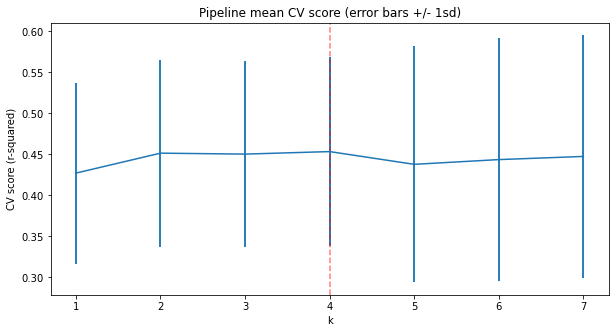

In [114]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [120]:
features = X_train.columns[lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()]
features

Index(['met_aud_score', 'imdb_score', 'imdb_us_score', 'imdb_fem_score'], dtype='object')

In [121]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
pd.Series(coefs, index=features).sort_values(ascending=False)

met_aud_score     7.948212e+07
imdb_fem_score    3.379018e+07
imdb_us_score     1.425553e+07
imdb_score       -1.014899e+06
dtype: float64

In [126]:
pipe2 = make_pipeline(
    StandardScaler(),
    LinearRegression())

In [127]:
cv_results = cross_validate(pipe2, X_train, y_train, cv=5)

In [128]:
cv_results

{'fit_time': array([0.01492214, 0.01020503, 0.00534391, 0.00649095, 0.00496411]),
 'score_time': array([0.00384688, 0.00270581, 0.00332284, 0.00249505, 0.00213385]),
 'test_score': array([0.58392304, 0.18345272, 0.39314641, 0.56254555, 0.5142563 ])}

In [131]:
np.mean(cv_results['test_score']), np.std(cv_results['test_score'])

(0.4474648037354204, 0.14763360075457832)

In [150]:
mae = cross_val_score(pipe2, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
mae

array([-52666553.19734148, -64696564.77598456, -57772180.69737028,
       -57174983.71197143, -57795082.75827844])

In [151]:
np.mean(mae)

-58021073.02818924

### Linear Regression on split data Critics vs Audience

In [133]:
#critic

X_train_critic = X_train[['tom_cri_score','met_cri_score']]
X_train_critic.head()

,tom_cri_score,met_cri_score
409,4.609457,5.833333
837,4.728546,10.616667
936,5.528897,7.000000
1155,7.040280,17.850000
1873,8.798599,20.000000


In [134]:
cv_results_critic = cross_validate(pipe2, X_train_critic, y_train, cv=5)

In [141]:
cv_results_critic['test_score']

array([0.25828227, 0.19819849, 0.19484046, 0.31448572, 0.25445115])

In [136]:
np.mean(cv_results_critic['test_score']), np.std(cv_results_critic['test_score'])

(0.24405161844875184, 0.04426256318025201)

In [153]:
mae_critic = cross_val_score(pipe2, X_train_critic, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(mae_critic)

-77179650.33150293

In [137]:
#audience
X_train_audience = X_train[['tom_cri_score','tom_aud_score','met_aud_score', 'imdb_score','imdb_us_score','imdb_fem_score' ]]
X_train_audience.head()

,tom_cri_score,tom_aud_score,met_aud_score,imdb_score,imdb_us_score,imdb_fem_score
409,4.609457,0.008060,0.198276,0.465330,0.559373,0.326985
837,4.728546,0.001306,0.063853,0.005592,0.022488,0.002129
936,5.528897,0.003169,0.069767,0.088650,0.170548,0.068022
1155,7.040280,0.001348,0.091419,0.143119,0.135088,0.108062
1873,8.798599,0.902951,0.972534,4.719027,4.780446,4.705971


In [138]:
cv_results_audience = cross_validate(pipe2, X_train_audience, y_train, cv=5)

In [140]:
cv_results_audience['test_score']

array([0.58343911, 0.17168794, 0.40638388, 0.54832766, 0.50821981])

In [139]:
np.mean(cv_results_audience['test_score']), np.std(cv_results_audience['test_score'])

(0.4436116811185505, 0.1483373108440296)

In [154]:
mae_audience = cross_val_score(pipe2, X_train_audience, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(mae_audience)

-56921733.78146763

### Random Forest

In [175]:
pipe3 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [201]:
n_estimators = [int(x) for x in np.logspace(start = 1, stop = 3, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'standardscaler':[StandardScaler(),None],
               'randomforestregressor__n_estimators': n_estimators,
            'randomforestregressor__max_depth': max_depth,
            }
random_grid

{'standardscaler': [StandardScaler(), None],
 'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'randomforestregressor__max_depth': [10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  None]}

In [202]:
rf_grid_cv = GridSearchCV(pipe3, param_grid=random_grid, cv=5, n_jobs=-1)

In [203]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [204]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110,
                                                              None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                               

In [205]:
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 40,
 'randomforestregressor__n_estimators': 69,
 'standardscaler': StandardScaler()}

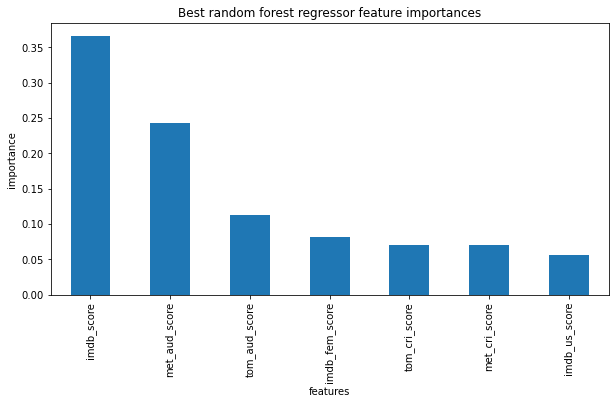

In [206]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [207]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.66867008, 0.39470213, 0.47706725, 0.58903248, 0.58531492])

In [208]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.5429573720876831, 0.09596029057486091)

In [209]:
rf_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae)

-48069027.26362361

### Random Forest on split data Critics vs Audience

In [214]:
pipe4 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=40,n_estimators=60,random_state=47)
)

In [215]:
#critic
rf_cv_results_critic = cross_validate(pipe4, X_train_critic, y_train, cv=5)

In [216]:
rf_cv_results_critic['test_score']

array([0.13324767, 0.00391699, 0.10897595, 0.17450515, 0.248404  ])

In [217]:
np.mean(rf_cv_results_critic['test_score']),np.std(rf_cv_results_critic['test_score'])

(0.1338099538341732, 0.0803456529497686)

In [218]:
rf_mae_critic = cross_val_score(pipe4, X_train_critic, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_critic)

-76594019.66003194

In [219]:
#audience
rf_cv_results_audience = cross_validate(pipe4, X_train_audience, y_train, cv=5)

In [220]:
rf_cv_results_audience['test_score']

array([0.60761909, 0.3445236 , 0.41526369, 0.5536897 , 0.55118304])

In [221]:
np.mean(rf_cv_results_audience['test_score']),np.std(rf_cv_results_audience['test_score'])

(0.49445582446596903, 0.098268633181306)

In [222]:
rf_mae_audience = cross_val_score(pipe4, X_train_audience, y_train, cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_audience)

-49857546.88654548

In [289]:
X_train_blockbuster = pd.concat([X_train,movie_class],axis = 1).dropna()
y_train_blockbuster = pd.concat([y_train,movie_class],axis = 1).dropna()

In [290]:
X_train_blockbuster = X_train_blockbuster[X_train_blockbuster['class'] == 'Blockbuster']
y_train_blockbuster = y_train_blockbuster[y_train_blockbuster['class'] == 'Blockbuster']


In [291]:
X_train_blockbuster = X_train_blockbuster.drop(columns=('class'))
y_train_blockbuster = y_train_blockbuster.drop(columns=('class'))


In [292]:
X_train_blockbuster.shape,y_train_blockbuster.shape

((84, 7), (84, 1))

In [293]:
rf_cv_results_blockbuster = cross_validate(pipe4, X_train_blockbuster, y_train_blockbuster.values.ravel(), cv=5)

In [294]:
rf_cv_results_blockbuster['test_score']

array([ 0.11486039, -0.28471819, -2.10781199, -3.56877444,  0.1853088 ])

In [295]:
rf_mae_blockbuster = cross_val_score(pipe4, X_train_blockbuster, y_train_blockbuster.values.ravel(), cv=5,scoring='neg_mean_absolute_error')
np.mean(rf_mae_blockbuster)

-285632713.34547794